In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Dataset Preparation

In [2]:
# Load dataset
df = pd.read_csv('dataset/Thyroid_Dataset_Scaled.csv')

# Define features and target
X = df.drop('Thyroid_Risk_Level', axis=1)
y = df['Thyroid_Risk_Level']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)
#80% train, 20% test size
#stratify makes sure your train ra test garna split garya data has same precentage distribution as in original dataset

# Model Training using random forest

In [3]:
model= RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=0.3,
    bootstrap=True,
    class_weight={0:1,1:1.5,2:2},
    random_state=9
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.5, 2: 2}, max_depth=10,
                       max_features=0.3, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=9)

In [4]:
# from xgboost import XGBClassifier

# model = XGBClassifier(
#     objective='multi:softprob',  # multi-class probability output
#     num_class=3,
#     n_estimators=500,
#     max_depth=6,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=9,
#     n_jobs=-1,
#     eval_metric='mlogloss'
# )

# model.fit(X_train, y_train)

# train_acc = model.score(X_train, y_train)
# test_acc = model.score(X_test, y_test)

# print(f"Train Accuracy: {train_acc:.2f}")
# print(f"Test Accuracy: {test_acc:.2f}")

# scores = cross_val_score(model, X, y, cv=5)
# print(scores.mean())

# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title("Confusion Matrix")
# plt.show()

# Model Evaluation

In [5]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       701
           1       0.77      0.78      0.77       700
           2       0.82      0.80      0.81       701

    accuracy                           0.81      2102
   macro avg       0.81      0.81      0.81      2102
weighted avg       0.81      0.81      0.81      2102



# Evaluation using Confusion Matrix

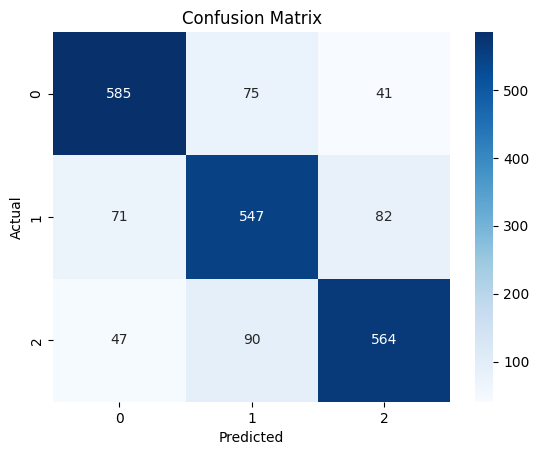

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Accuracy

In [7]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.93
Test Accuracy: 0.81


# Cross validation to check if model is stable

In [8]:
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print(scores.mean())
print(scores.std())

[0.79162702 0.81199429 0.80723465 0.79390766 0.84245597]
0.8094439193696445
0.0182208565000048


std is >0.02 and mean is 80%; model is stable and not just lucky

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=9)

results = cross_validate(model, X, y, cv=skf, scoring=["accuracy", "recall_macro", "f1_macro"])

for metric in ["test_accuracy", "test_recall_macro", "test_f1_macro"]: 
    print(metric, np.mean(results[metric]), np.std(results[metric]))

test_accuracy 0.811727368282332 0.008564179987110409
test_recall_macro 0.8117334420216018 0.008571912417821806
test_f1_macro 0.8118408420783855 0.008289771120928907


# Saving model

In [10]:
joblib.dump(model,'risk_score_model.pkl')

['risk_score_model.pkl']

# Feature importance calculation

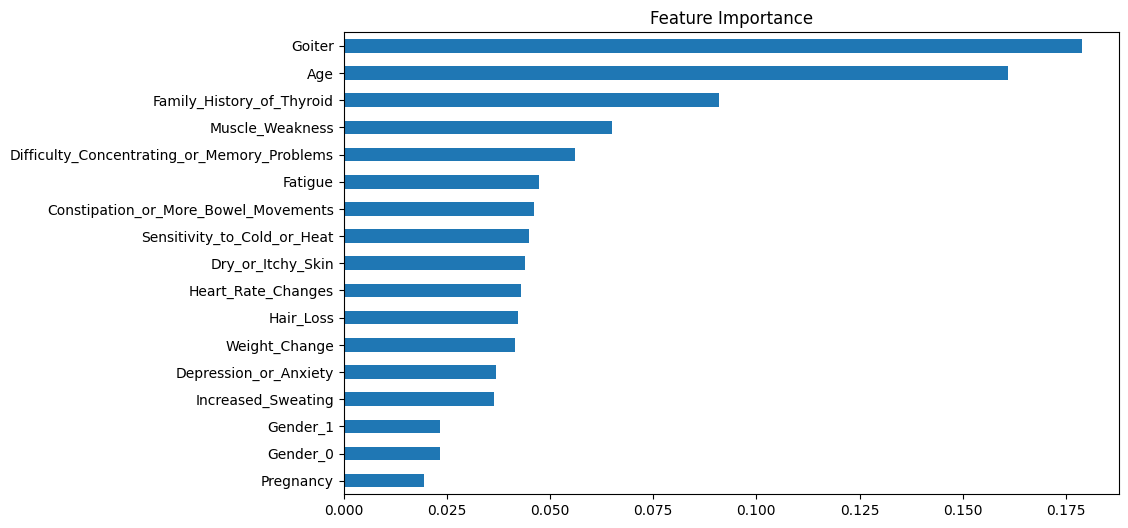

In [11]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.show()